In [8]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/xigua3.0.csv")
data

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [7]:
data2 = data[["密度","含糖率", "好瓜"]]
data2["好瓜"] = data2["好瓜"].replace({"是":1, "否":0})
data2

C:\Users\wangy\AppData\Local\Temp\ipykernel_1700\3022761424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["好瓜"] = data2["好瓜"].replace({"是":1, "否":0})


,密度,含糖率,好瓜
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1
5,0.403,0.237,1
6,0.481,0.149,1
7,0.437,0.211,1
8,0.666,0.091,0
9,0.243,0.267,0


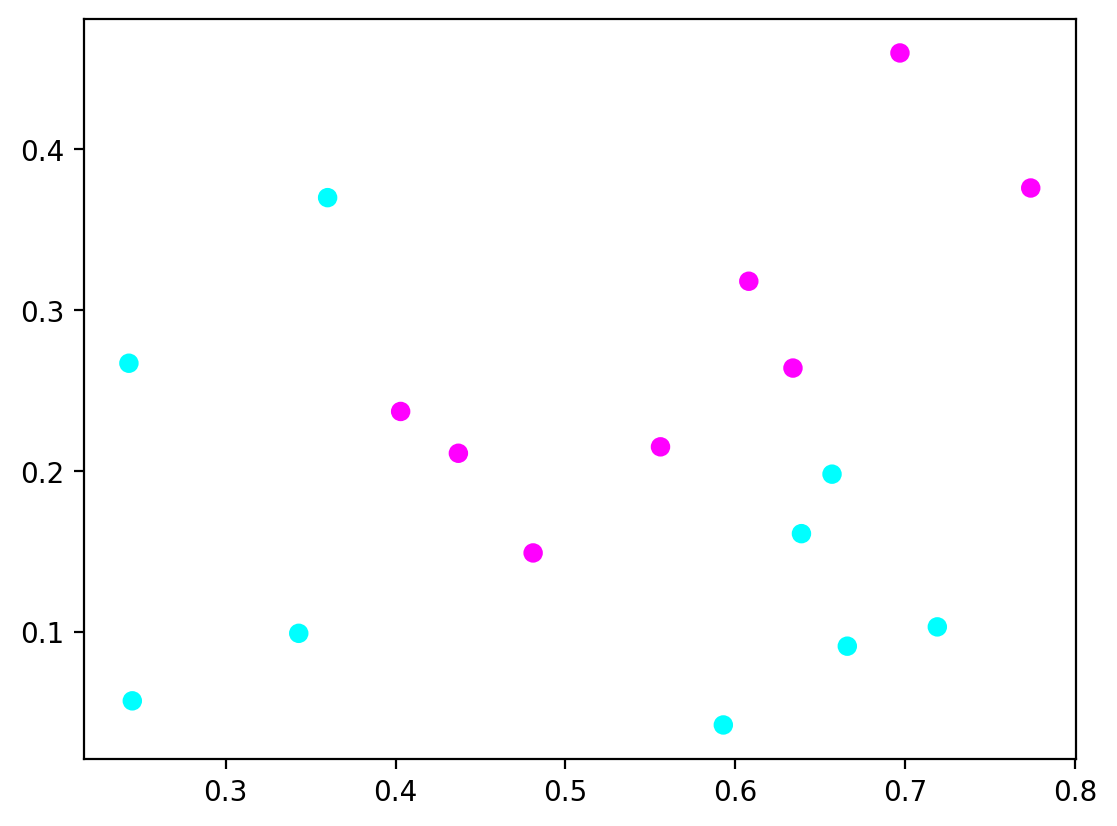

In [25]:
plt.rcParams['figure.dpi']=200
plt.scatter(data2['密度'],data2['含糖率'], c=data2['好瓜'],cmap='cool')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data2[['密度']],data2['含糖率'])
model.score(data2[['密度']],data2['含糖率'])

0.03837253996033396

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


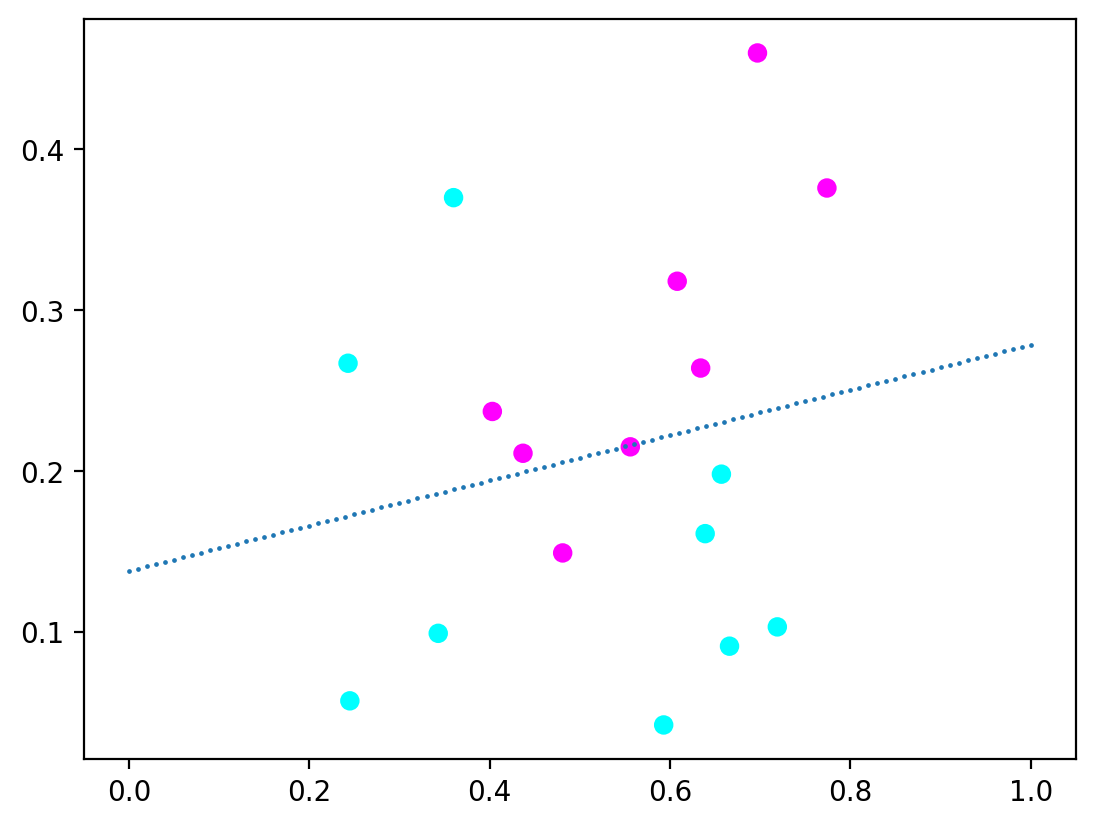

In [29]:
x = np.linspace(0,1,101)
y = model.predict(x.reshape(101,1))
plt.rcParams['figure.dpi']=200
plt.scatter(data2['密度'],data2['含糖率'], c=data2['好瓜'],cmap='cool')
plt.scatter(x,y,s=0.5)
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(data2[['密度','含糖率']],data2['好瓜'])
model.score(data2[['密度','含糖率']],data2['好瓜'])

0.6470588235294118

In [31]:
scale = 100
x = np.linspace(0, 1, scale + 1)
y = np.linspace(0, 1, scale + 1)
x, y = np.meshgrid(x, y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_input

array([[0.  , 0.  ],
       [0.01, 0.  ],
       [0.02, 0.  ],
       ...,
       [0.98, 1.  ],
       [0.99, 1.  ],
       [1.  , 1.  ]])

In [33]:
disp_output = model.predict(disp_input)
disp_output

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

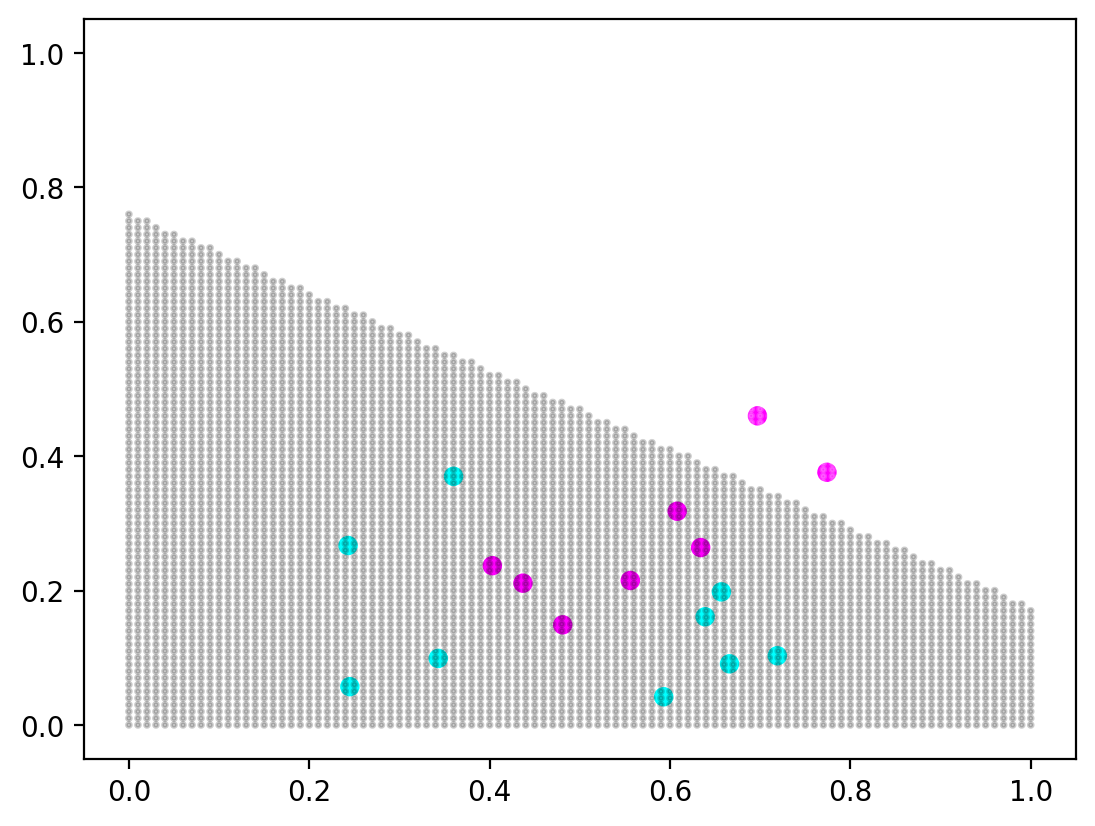

In [40]:
plt.rcParams['figure.dpi']=200
plt.scatter(disp_input[:,0],disp_input[:,1], c=disp_output,cmap='gray', alpha=0.2, s=3)
plt.scatter(data2['密度'],data2['含糖率'], c=data2['好瓜'],cmap='cool')
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


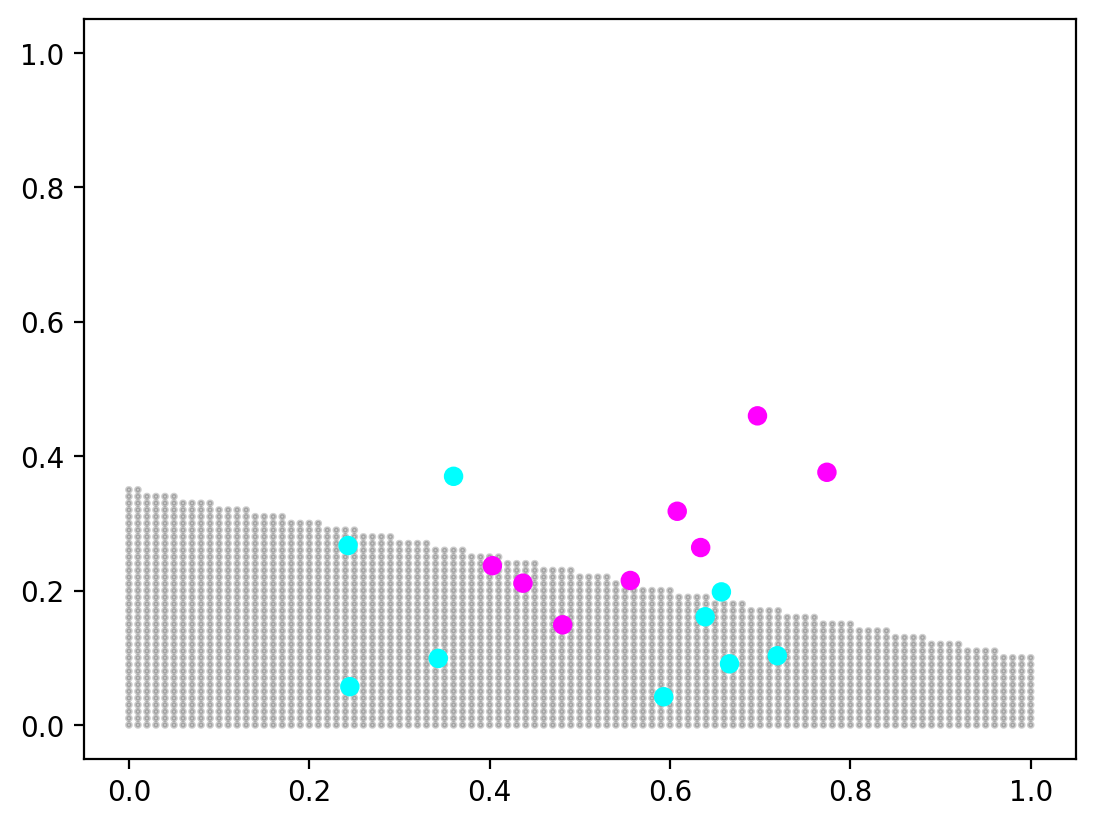

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(data2[['密度','含糖率']],data2['好瓜'])
model.score(data2[['密度','含糖率']],data2['好瓜'])
disp_output = model.predict(disp_input)
plt.scatter(disp_input[:,0],disp_input[:,1], c=disp_output,cmap='gray', alpha=0.2, s=3)
plt.scatter(data2['密度'],data2['含糖率'], c=data2['好瓜'],cmap='cool')
plt.show()